In [ ]:
# Estimator

In [1]:
#1. Load dependencies
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sweep import config
from SWEEP_estimator import main
print("Imports complete!")

Imports complete!
Imports complete!


<Axes: >

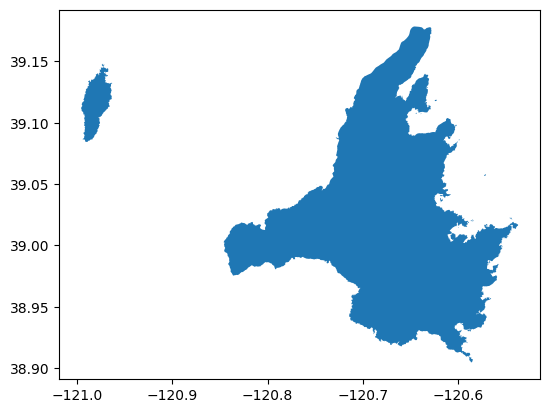

In [2]:
aoi_path = os.path.join(config.demo_dir, "demo_multipoly.shp")
aoi = gpd.read_file(aoi_path)
aoi.plot()

The Estimator uses data from CAL FIRE's damage inspection database to identify structures damaged by wildfire.
It uses parcel and footprint data to esitmate the square footage for each structure.

In [3]:
# Filter spatiallly-- we use two polygon geometries to pull data for known incidents.
# However, SWEEP doesn't automatically know if there are other fires in the region-- using a date filter is advised.
emissions_gdf, agg_table, vehicle_table = main(
    get_mode = "use_default",
    filter_method = "Spatial",
    polygon_input = aoi,
    aggregate_fields=['AIR DISTRICT', 'AOI_INDEX']
    )
print("running...")

Loading BSDB using use_default...
Loading BSDB using use_default...


Applying filter criteria...
No date filter applied.
Reprojecting polygon from EPSG:4326 to EPSG:3310.
451 rows after spatial filtering with   fire_name    incident_n start_date                          group_id fp_source                                           geometry
0  Mosquito  CATNF 001371 2022-09-06  Mosquito_CATNF 001371_2022-09-06      FRAP  MULTIPOLYGON (((-120.56853 38.98437, -120.5686...
1     River  CANEU 020628 2021-08-04     River_CANEU 020628_2021-08-04      FRAP  POLYGON ((-120.99035 39.0844, -120.99116 39.08....
       OBJECTID            damage  streetnumber        streetname  ... aoi_start_date                      aoi_group_id aoi_fp_source aoi_index
60000     60201         No Damage       19904.0             Meyer  ...     2021-08-04     River_CANEU 020628_2021-08-04          FRAP         1
60001     60202         No Damage       20038.0             Meyer  ...     2021-08-04     River_CANEU 020628_2021-08-04          FRAP         1
60002     60203         No Dama

Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'AOI_INDEX']...
Aggregating on: ['AIR DISTRICT', 'AOI_INDEX']
Calculating vehicle emissions with CARB factors...
216
Ratio provided: 311.03999999999996 vehicles estimated using ratio: 1.44
CARB efs from: C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\data\emissions_factors\CARB_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM']
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM']
Writing Emissions Report to C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\outputs\SWEEP_20250610_123953\Emissions_Report.xlsx
Writing Aggregated Report to C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\outputs\SWEEP_20250610_123953\Aggregated_Report.xlsx
Writing Vehicle Report to C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\outputs\SWEEP_20250610_123953\Vehicle_Report.xlsx
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'AOI_INDEX']...
Aggregating on: ['AIR DISTRICT', 'AOI

Spatial data written to C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\outputs\SWEEP_20250610_123953\Emissions_Spatial.gpkg
running...
Spatial data written to C:\Users\gstarrs\Projects\CARB\SWEEP\sweep_test\outputs\SWEEP_20250610_123953\Emissions_Spatial.gpkg
running...


In [4]:
# In the returned dataframes, columns from the aoi_source are retained and tagged with "AOI" at the start of the column.
# predicted_emissions_gdf is a geodataframe of each record used to estimate emissions.
# These are parcels that fell within the AOI and were populated with data for living squarefootage.
print(emissions_gdf.crs)
emissions_gdf

EPSG:3310
EPSG:3310


,AOI_FIRE_NAME,AOI_INCIDENT_N,AOI_START_DATE,AOI_GROUP_ID,AOI_FP_SOURCE,AOI_INDEX,INCIDENTNAME,INCIDENTNUM,START_DATE,GLOBALID_DINS,DAMAGE,STRUCTURETYPE,STRUCTURECATEGORY,CAT,SQFT,SQFT_SOURCE,COUNTY,AIR_BASIN,AIR_DISTRICT,COABDIS,CONSUMPTION_FACTOR,FRAME_FACTOR,CONTENTS_FACTOR,geometry,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,MONTH,YEAR
60000,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{477C8FC7-D0A2-4CD9-B7BA-9890E29FCCF3},No Damage,Single Family Residence Single Story,Single Residence,SFSS,1212.316037,MODEL_A,Nevada,MOUNTAIN COUNTIES,Northern Sierra,29_MC_NSI,0.00,31.07,5.87,POINT (-83915.197 124868.904),0.000,0.000,0.000,0.000,0.000,8,2021
60001,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{23C3F9A7-2979-4F7A-A1D2-B054A768F7FF},No Damage,Single Family Residence Single Story,Single Residence,SFSS,2196.783443,MODEL_A,Nevada,MOUNTAIN COUNTIES,Northern Sierra,29_MC_NSI,0.00,31.07,5.87,POINT (-83969.656 124811.244),0.000,0.000,0.000,0.000,0.000,8,2021
60002,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{ABADDDBF-E79C-4F72-80B0-3F3B0CE990B3},No Damage,Single Family Residence Single Story,Single Residence,SFSS,1318.599547,MODEL_A,Nevada,MOUNTAIN COUNTIES,Northern Sierra,29_MC_NSI,0.00,31.07,5.87,POINT (-83974.045 124863.738),0.000,0.000,0.000,0.000,0.000,8,2021
60003,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{8712AD29-0DF0-4B9C-8C4E-711F2B603CC4},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1040.000000,PARCEL,Nevada,MOUNTAIN COUNTIES,Northern Sierra,29_MC_NSI,0.95,31.07,5.87,POINT (-84106.629 124849.078),1.259,0.006,0.001,0.717,0.052,8,2021
60004,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{398EFF4E-86EC-429F-B22E-FD739EC464FD},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,288.000000,PARCEL,Nevada,MOUNTAIN COUNTIES,Northern Sierra,29_MC_NSI,0.95,31.07,5.87,POINT (-84170.651 124695.914),0.349,0.002,0.000,0.199,0.014,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74295,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP,0,Mosquito,CATNF 001371,2022-09-06,{50AC5AC1-AEEE-488F-AC15-D0CAD09BE533},Destroyed (>50%),Utility Misc Structure,Other Minor Structure,OTHER,855.802189,FOOTPRINT,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.95,31.07,5.87,POINT (-56245.77 115551.886),1.036,0.005,0.001,0.590,0.043,9,2022
74386,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP,0,Mosquito,CATNF 001371,2022-09-06,{EFCAF0C5-6899-4BF9-8537-C7CA8E1041B0},No Damage,Infrastructure,Infrastructure,INF,1458.000000,MEDIAN,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.00,31.07,5.87,POINT (-64502.697 110234.999),0.000,0.000,0.000,0.000,0.000,9,2022
74392,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP,0,Mosquito,CATNF 001371,2022-09-06,{484CE39B-7BF1-474A-AD25-8499CE570A7D},No Damage,Utility Misc Structure,Other Minor Structure,OTHER,1545.168587,FOOTPRINT,El Dorado,MOUNTAIN COUNTIES,El Dorado,9_MC_ED,0.00,31.07,5.87,POINT (-61402.017 106145.955),0.000,0.000,0.000,0.000,0.000,9,2022
74393,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP,0,Mosquito,CATNF 001371,2022-09-06,{CF25B80A-8E69-4C42-B1FE-C244211565F1},No Damage,Utility Misc Structure,Other Minor Structure,OTHER,3093.742863,FOOTPRINT,El Dorado,MOUNTAIN COUNTIES,El Dorado,9_MC_ED,0.00,31.07,5.87,POINT (-61293.213 106065.387),0.000,0.000,0.000,0.000,0.000,9,2022


<Axes: >

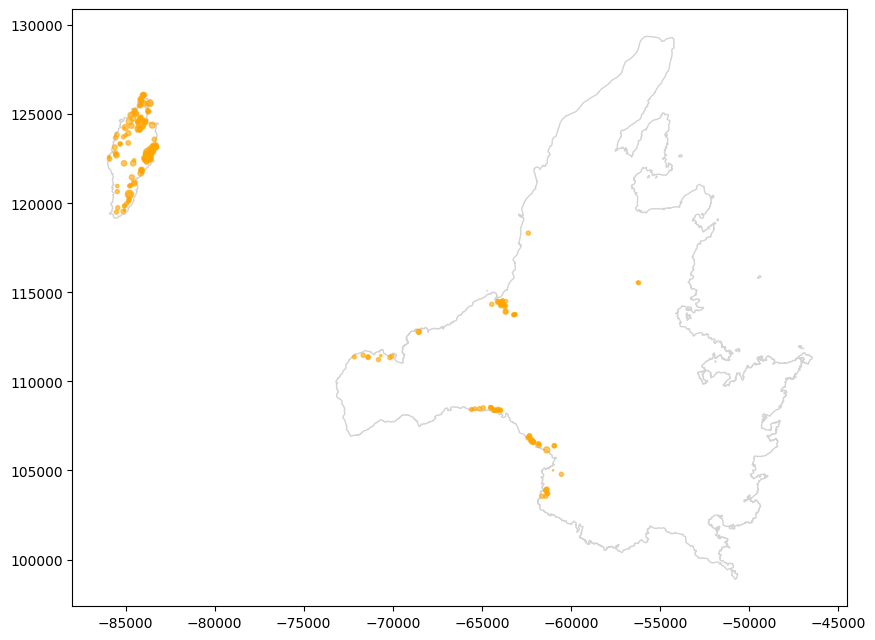

In [5]:
# Read AOI layer
aoi = gpd.read_file(aoi_path)
aoi_gdf = aoi.to_crs(emissions_gdf.crs)

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot AOI in light gray
aoi_gdf.plot(ax=ax, color='none', edgecolor='lightgray', linewidth=1)

# Compute marker sizes based on E_CO_TN (adjust scaling factor as needed)
sizes = emissions_gdf["E_CO_TN"].fillna(0) * 5

# Plot predicted emissions with symbol size proportional to E_CO_TN
emissions_gdf.plot(
    ax=ax,
    color='orange',
    alpha=0.6,
    markersize=sizes
)

In [6]:
# In this demo run, we provided "AIR DISTRICT" and "AOI_INDEX" as the aggregation fields.
# As you can see our results are split by AOI_INDEX (the polygon) and AIR_DISTRICT.
# We get total emissions for each polygon in each air district.

agg_table

,AIR_DISTRICT,AOI_INDEX,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,DAMAGED_STRUCTURES
0,El Dorado,0,70.53,0.33,0.07,40.17,2.92,40
1,Northern Sierra,1,150.28,0.71,0.14,85.59,6.22,79
2,Placer,0,55.88,0.26,0.05,31.82,2.32,37
3,Placer,1,129.24,0.61,0.12,73.60,5.35,62


In [9]:
# We can use the full dataframe to add other AOI attributes back in:
aoi_cols = [col for col in emissions_gdf.columns if col.startswith("AOI_")]

# 2. Drop duplicates to get unique AOI records
unique_aoi = emissions_gdf[aoi_cols].drop_duplicates()

# 3. Merge with agg_table on AOI_INDEX
agg_table_aoi = agg_table.merge(unique_aoi, on="AOI_INDEX", how="left")
agg_table_aoi

,AIR_DISTRICT,AOI_INDEX,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,DAMAGED_STRUCTURES,AOI_FIRE_NAME,AOI_INCIDENT_N,AOI_START_DATE,AOI_GROUP_ID,AOI_FP_SOURCE
0,El Dorado,0,70.53,0.33,0.07,40.17,2.92,40,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP
1,Northern Sierra,1,150.28,0.71,0.14,85.59,6.22,79,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP
2,Placer,0,55.88,0.26,0.05,31.82,2.32,37,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP
3,Placer,1,129.24,0.61,0.12,73.60,5.35,62,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP
